In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from GraphLaplacian.binary import GraphLaplacian, MBOBinary
from GraphLaplacian.multilabel import GLMultiClass, MBOMultiClass
from GraphLaplacian.helper import plot
import pdb
from IPython.display import clear_output
from sklearn.datasets import make_moons, make_circles, make_classification
import scipy
import pdb

sns.set()

In [3]:
import random
import math

## Data 1

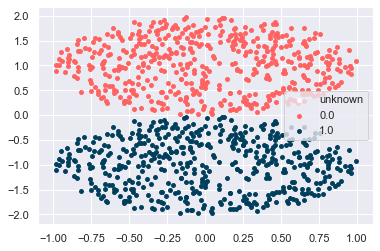

In [28]:
a = np.random.random(500) * 2 * 3.14
r = 1 * np.sqrt(np.random.random(500))
blue = [[x,y-1] for x,y in zip(r * np.cos(a), r * np.sin(a))]
red = [[x,y+1] for x,y in zip(r * np.cos(a), r * np.sin(a))]
Y = list(np.ones(len(blue))) + list(np.ones(len(red))*0)
X = list(blue) + list(red)

plot(X, Y, [])

## Balanced Class

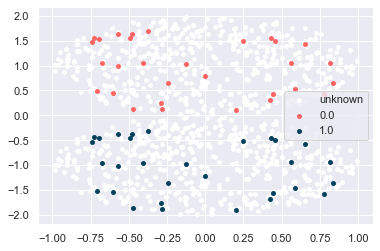

In [29]:
X0 = list(blue[:30]) + list(red[:30])
Y0 = list(np.ones(len(blue)))[:30] + list(np.ones(len(red))*0)[:30]
X1 = list(blue[30:]) + list(red[30:])

plot(X0, Y0, X1)

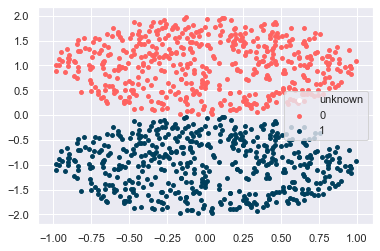

In [30]:
GL = GraphLaplacian(X0, Y0, X1, cov=0.5)
GL.solve()
plot(X0 + X1, GL.Y, [])

Interation 0 error 0.5064655172413793
Interation 1 error 0.0


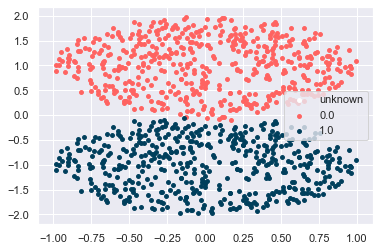

In [31]:
MBO = MBOBinary(X0, Y0, X1, cov=0.5, dT=0.001, Nd=3)
MBO.solve()
plot(X0 + X1, MBO.Y, [])

## Unbalanced Class

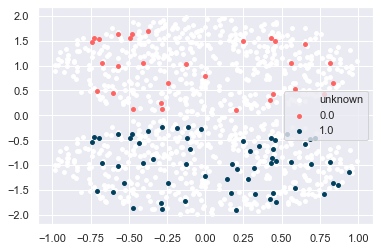

In [32]:
X0 = list(blue[:60]) + list(red[:30])
Y0 = list(np.ones(len(blue)))[:60] + list(np.ones(len(red))*0)[:30]
X1 = list(blue[60:]) + list(red[30:])

plot(X0, Y0, X1)

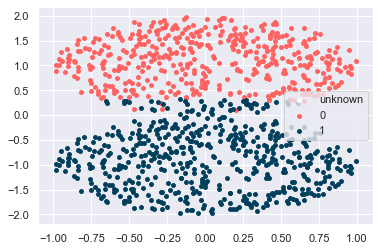

In [33]:
GL = GraphLaplacian(X0, Y0, X1, cov=0.5)
GL.solve()
plot(X0 + X1, GL.Y, [])

Interation 0 error 0.4945652173913043
Interation 1 error 0.0


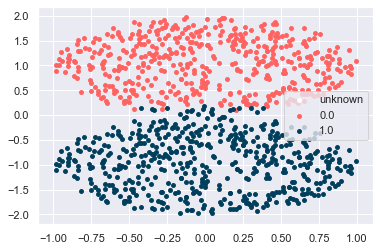

In [34]:
MBO = MBOBinary(X0, Y0, X1, cov=0.5, dT=0.001, Nd=3)
MBO.solve()
plot(X0 + X1, MBO.Y, [])

## Different Density

### 3:7

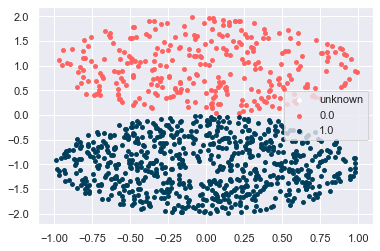

In [35]:
a = np.random.random(700) * 2 * 3.14
r = 1 * np.sqrt(np.random.random(700))
blue = [[x,y-1] for x,y in zip(r * np.cos(a), r * np.sin(a))]

a = np.random.random(300) * 2 * 3.14
r = 1 * np.sqrt(np.random.random(300))
red = [[x,y+1] for x,y in zip(r * np.cos(a), r * np.sin(a))]
Y = list(np.ones(len(blue))) + list(np.ones(len(red))*0)
X = list(blue) + list(red)

plot(X, Y, [])

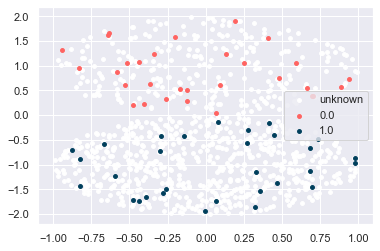

In [36]:
X0 = list(blue[:30]) + list(red[:30])
Y0 = list(np.ones(len(blue)))[:30] + list(np.ones(len(red))*0)[:30]
X1 = list(blue[30:]) + list(red[30:])

plot(X0, Y0, X1)

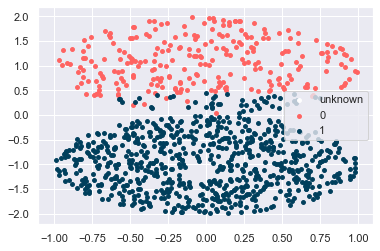

In [37]:
GL = GraphLaplacian(X0, Y0, X1, cov=0.5)
GL.solve()
plot(X0 + X1, GL.Y, [])

Interation 0 error 0.3560606060606061
Interation 1 error 0.0


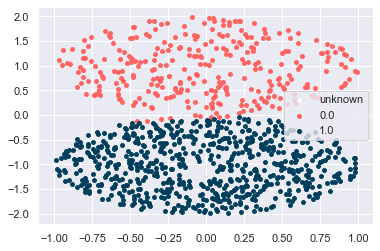

In [38]:
MBO = MBOBinary(X0, Y0, X1, cov=0.5, dT=0.001, Nd=3)
MBO.solve()
plot(X0 + X1, MBO.Y, [])